# Cats and dogs classification

### Udacity - Intro to TensorFlow for Deep Learning

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load data

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

zip_dir_base = os.path.dirname(zip_dir)
print(zip_dir_base)

C:\Users\user\.keras\datasets


In [3]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [4]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training images: 2000
Total validation images: 1000


In [5]:
BATCH_SIZE = 32

IMG_SHAPE  = 150  # size : 150 * 150

### Data preparation - image generator

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255)
valid_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = valid_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=validation_dir,
                                                         shuffle=False,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

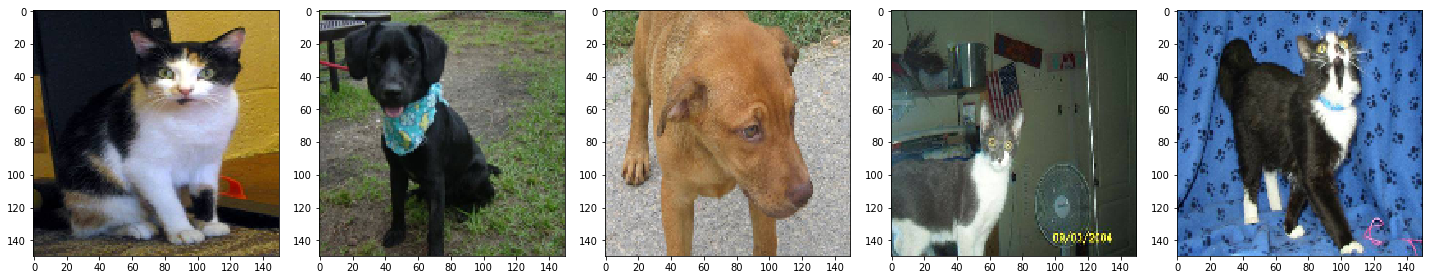

In [8]:
sample_images, _ = next(train_data_gen)

plotImages(sample_images[:5])

### Define the model and training

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
____

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
image, label = train_data_gen.next()
print(image.shape)
print(label.shape)

(32, 150, 150, 3)
(32,)


In [12]:
EPOCHS = 30

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
    verbose=2
)

Epoch 1/30
63/63 - 8s - loss: 0.7077 - acc: 0.4755 - val_loss: 0.6925 - val_acc: 0.5770
Epoch 2/30
63/63 - 6s - loss: 0.6910 - acc: 0.5185 - val_loss: 0.6888 - val_acc: 0.5100
Epoch 3/30
63/63 - 6s - loss: 0.6888 - acc: 0.5210 - val_loss: 0.6884 - val_acc: 0.5600
Epoch 4/30
63/63 - 6s - loss: 0.6754 - acc: 0.5680 - val_loss: 0.6524 - val_acc: 0.6220
Epoch 5/30
63/63 - 6s - loss: 0.6263 - acc: 0.6485 - val_loss: 0.6110 - val_acc: 0.6460
Epoch 6/30
63/63 - 6s - loss: 0.5749 - acc: 0.6940 - val_loss: 0.6037 - val_acc: 0.7090
Epoch 7/30
63/63 - 6s - loss: 0.5332 - acc: 0.7200 - val_loss: 0.6467 - val_acc: 0.6450
Epoch 8/30
63/63 - 6s - loss: 0.4847 - acc: 0.7610 - val_loss: 0.6010 - val_acc: 0.6860
Epoch 9/30
63/63 - 6s - loss: 0.4060 - acc: 0.8160 - val_loss: 0.6328 - val_acc: 0.6940
Epoch 10/30
63/63 - 6s - loss: 0.3269 - acc: 0.8580 - val_loss: 0.6713 - val_acc: 0.7230
Epoch 11/30
63/63 - 6s - loss: 0.2396 - acc: 0.8975 - val_loss: 0.7468 - val_acc: 0.7220
Epoch 12/30
63/63 - 6s - loss:

### Visualizing results of the training

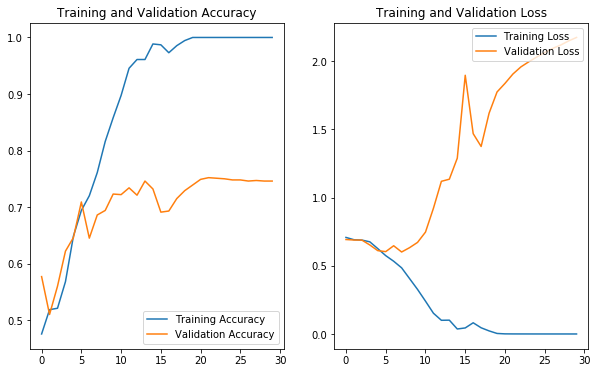

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()